# Homework \#5
Due July 29 @ 11:59pm

## Submission requirements
Upload a **single PDF file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your PDF corresponds to.

## Problem 1 -- Nonconvex Quadratics

Suppose you have the constraint:

$2x^2 + y^2+ 2z^2 - 3xy + xz - 4yz \leq 0 \quad\quad$ (1)

(a)  Write constraint (1) in the standard form $v^TQv\leq 0$ where $Q$ is a symmetric matrix.  What is $Q$ and what is $v$?

(b)  This constraint is not convex (i.e., the set of points satisfying the constraint is not an ellipsoid). Explain why this is the case. *Hint*: You can perform an orthogonal decomposition of a symmetric matrix $Q$ in Julia like this: 


In [13]:
using LinearAlgebra
(L,U) = (eigvals(Q),eigvecs(Q)) # L is the vector of eigenvalues and U is orthogonal
U * Diagonal(L) * U' # this is equal to Q (as long as Q was symmetric to begin with)
;


(c)  We can write constraint (1) in norm format as follows:

$‖Av‖_2^2−‖Bv‖_2^2\leq 0 \quad\quad$ (2) 

Find matrices $A$ and $B$ that make this constraint equivalent to (1).

(d)  Explain how to find $(x, y, z)$ that satisfy the above constraint but make $2x^2+ y^2 + 2z^2$ arbitrarily large.

## Problem 2 -- Circles within Circles

Formulate a convex program to solve the minimum enclosing ball (MEB) problem.  You need to determine the center \$z\$ of a ball, and its radius \$d\$ so that each of the circles centered at \$c_i\$ with radius \$r_i\$ are enclosed in your generated circle.  Your task is to find the cirle of smallest radius that encircles all the other circles.

You can use the following code to start building your model. Start with $n=5$ circles to help with debugging, but display the output of your model for both $n=5$ and a very large value of $n$, such as $n=200$.

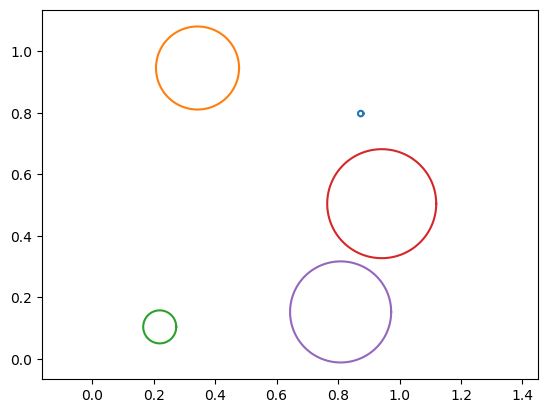

In [1]:
n = 5
using Random, PyPlot
r = [rand()*0.2 for i in 1:n] # randomly generate n radii with length between 0 and 0.2
# randomly generate n points with (x,y) coords between 0 and 1
c = [rand() for i in 1:n, j in 1:2] 

t = range(0,stop=2*pi,length=100) # parameter that traverses the circle

# for each of the n points
for i in 1:n
    # plot circle radius r[i] with center (x[i],y[i])
    plot( c[i,1] .+ r[i]*cos.(t), c[i,2] .+ r[i]*sin.(t)) 
end

axis("equal"); # make x and y scales equal